In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
temp = np.load("../logs/exp_log1602530479.npy", allow_pickle=True)

In [3]:
temp = temp.reshape(1)[0]

print(temp.keys())

dict_keys(['max_fitness', 'mean_fitness', 'sd_fitness', 'total_env_interacts', 'rmsd_mean', 'rmsd_min', 'rmsd_sd'])


In [4]:
temp_nn = np.load("../logs/exp_log1600368726.npy", allow_pickle=True)
temp_nn = temp_nn.reshape(1)[0]

temp_nn.keys()

dict_keys(['max_fitness', 'mean_fitness', 'sd_fitness', 'total_env_interacts', 'rmsd_mean', 'rmsd_min', 'rmsd_sd'])

In [5]:
my_cmap = plt.get_cmap("plasma", lut=128)


In [9]:
temp_direct = np.load("../logs/exp_log1602532536.npy", allow_pickle=True)
temp_direct = temp_direct.reshape(1)[0]

temp_direct.keys()

dict_keys(['max_fitness', 'mean_fitness', 'sd_fitness', 'total_env_interacts', 'rmsd_mean', 'rmsd_min', 'rmsd_sd'])

In [10]:
my_cmap(10)

(0.221197, 0.016497, 0.602083, 1.0)

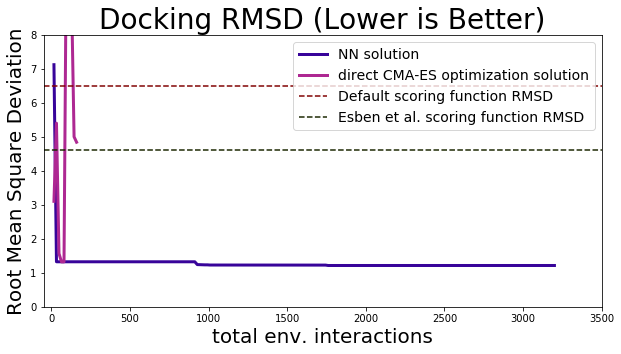

In [11]:
np.min(temp_nn["rmsd_min"])

default_rmsd = [6.499 for elem in temp_direct["max_fitness"]] 
esben_rmsd = [4.625 for elem in temp_direct["max_fitness"]]

plt.figure(figsize=(10,5))

plt.plot(temp_nn["total_env_interacts"][0:200], \
         temp_nn["rmsd_min"][0:200], lw=3, color=my_cmap(10),\
        label="NN solution")

plt.plot(temp_direct["total_env_interacts"], temp_direct["rmsd_min"],\
         lw=3, color=my_cmap(50),\
        label="direct CMA-ES optimization solution")
         
plt.plot([-100,3500], default_rmsd[0:2],"--", color=[.5,0,0], label="Default scoring function RMSD")
plt.plot([-100, 3500], esben_rmsd[0:2],"--", color=[.1,0.15,0], label="Esben et al. scoring function RMSD")
plt.legend(fontsize=14)
plt.axis([-50,3500, 0, 8])

plt.xlabel("total env. interactions", fontsize=20)
plt.ylabel("Root Mean Square Deviation", fontsize=20)
plt.title("Docking RMSD (Lower is Better)", fontsize=28)
plt.savefig("../assets/signs_of_life.png")
plt.show()

In [ ]:
np.min(temp_direct["rmsd_min"])

In [ ]:
default_rmsd = [6.499 for elem in temp_direct["max_fitness"]] 
esben_rmsd = [4.625 for elem in temp_direct["max_fitness"]]

plt.figure(figsize=(10,10))
plt.plot(temp_direct["total_env_interacts"], temp_direct["rmsd_min"])
plt.plot(temp_direct["total_env_interacts"], default_rmsdd)
plt.plot(temp_direct["total_env_interacts"], esben_rmsd)
#plt.axis([0,9000, 0, 1.5])
plt.show()

In [ ]:
my_max = [2 - (elem-0.34)/4 for elem in temp["max_fitness"]]

default_rmsd = [0.34193939 for elem in temp["max_fitness"]] 
esben_rmsd = [0.23721212 for elem in temp["max_fitness"]]

plt.figure(figsize=(10,10))
plt.plot(temp["total_env_interacts"], my_max)
plt.plot(temp["total_env_interacts"], default_rmsd)
plt.plot(temp["total_env_interacts"], esben_rmsd)
plt.axis([0,9000, 0, 1.5])
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(temp["total_env_interacts"], temp["max_fitness"])
plt.plot(temp["total_env_interacts"], temp["mean_fitness"])
plt.fill_between(temp["total_env_interacts"], \
                 [elem1 - elem2 for elem1, elem2 in zip(temp["mean_fitness"], temp["sd_fitness"])],\
                 [elem1 + elem2 for elem1, elem2 in zip(temp["mean_fitness"], temp["sd_fitness"])])

plt.plot(temp["total_env_interacts"], temp["max_fitness"])
                 
plt.show()